### Portfolio assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

![](https://i.imgur.com/0v1CGNV.png)

In [35]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
type_dict = {'Team': 'object', 'Season': 'object', 'KEY': 'object', 'Player': 'object', 'Position': 'object', 'Appearances': 'float64', 'Goals': 'float64', 'Started': 'float64', 'Started As A Sub': 'float64', 'Came On': 'float64', 'Taken Off': 'float64', 'Own Goals': 'float64', 'Type Of Goal': 'object', 'First Half': 'float64', 'Second Half': 'float64', 'First Scorer': 'object', 'Last Scorer': 'object', 'Home': 'float64', 'Away': 'float64', 'Right Foot': 'float64', 'Left Foot': 'float64', 'Header': 'float64', 'Other Method': 'float64', 'Open Play': 'float64', 'Cross': 'float64', 'Free Kick': 'float64', 'Direct Free Kick': 'float64', 'Throw In': 'float64', 'Penalty': 'float64', 'Corner': 'float64', 'Other Type Of Play': 'float64', 'Minutes played': 'float64', 'Min/goal': 'float64', 'Assists': 'float64', '% Assists': 'float64', 'Leading Recipient': 'object', 'Recipient Goals': 'float64', 'CS': 'float64', '% Clean Sheets': 'float64', 'Hat Tricks': 'float64', 'Yellow Cards': 'float64', 'Yellow - First Half': 'float64', 'Yellow - Second Half': 'float64', 'Yellow - Home': 'float64', 'Yellow - Away': 'float64', 'Yelow - Minutes Played': 'float64', 'Minutes per Yellow Cards': 'float64', 'Sent Off': 'float64', 'Straight Red Card': 'float64', 'Two Yellow Cards': 'float64', 'Red - First Half': 'float64', 'Red - Second Half': 'float64', 'Red - Home': 'float64', 'Red - Away': 'float64', 'Red - Minutes Played': 'float64', 'Minutes per Red Cards': 'float64'}
playerStatsAllLeagues = pd.read_csv('merged-csv-files.csv', sep=',', dtype=type_dict)
playerStatsAllLeaguesNoTeams = playerStatsAllLeagues[playerStatsAllLeagues['Position'] != "Other"];

def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

#### League & Position

I am expected a small correlation between the position and the league. I think all leagues have different play styles and require different players on different positions. This might also result in a difference between the number of players required on positions. 

In [36]:
playerStatsAllLeaguesNoTeamsContingencyTable = create_contingency_table(playerStatsAllLeaguesNoTeams, 'League', 'Position')
playerStatsAllLeaguesNoTeamsContingencyTable

League,Bundesliga,Eredivisie,French Ligue 1,La Liga,Premier League,Scottish Premiership,Serie A
Position,,,,,,,
Defender,1044,854,1239,1320,1308,837,1511
Forward,706,554,915,855,796,659,886
Goalkeeper,395,346,450,458,454,296,594
Midfielder,1397,1102,1710,1542,1642,1023,1744


There are a few things that stand out from this contingency table. At first it's very clear that a few leagues have a lot more midfielders than players on other positions. Also it is clear that some leagues have way more players than other leagues. There are a few explanations for this, but in short this is due to: 
1. more teams in the league
2. more transfers and thus more different players over the years

And of course there is also the fact that (most of the time) there are never two goalkeepers from the same team on the pitch. This means that clubs need less players on specific positions. But because every league plays with the same rules, this should not be effecting the correlation. 

<AxesSubplot:xlabel='Position'>

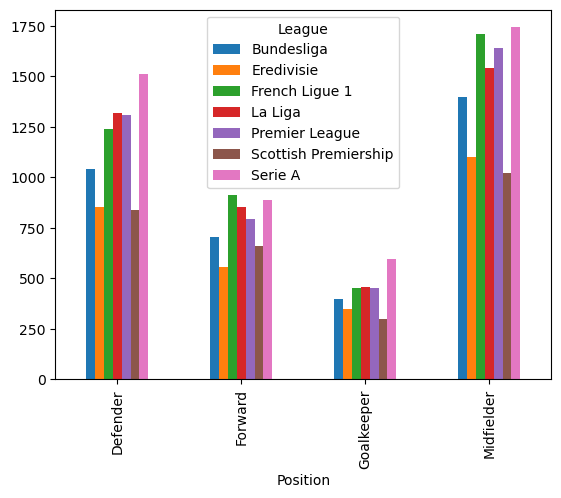

In [37]:
playerStatsAllLeaguesNoTeamsContingencyTable.plot(kind='bar')

From this barplot it is starting to get clear that there are a few leagues with major differences between the number of players on positions. When taking for example the Serie A, this difference can be spotted very easy. While having a lot of midfielders and defenders, the Serie A has just a few attackers and (compared to the other leagues) a lot of goalkeepers.

In [38]:
check_cat_vs_cat_correlation(playerStatsAllLeaguesNoTeams, 'League', 'Position')

The odds of a correlation between League and Position is 99.99994389584538% (Based on a p value of 5.610415462071326e-07).
This percentage needs to be at least 95% for a significant correlation.


Thanks to this calculation it has become clear that there is a significant correlation between the leagues and the positions. This probably has a lot to do with the different play styles in the leagues. 

In leagues like the Serie A it's very populair to play in a 1-5-3-2, a 1-3-5-2, and some teams even play in a 1-5-3-1-1 formation. These formations require only 1 or 2 attackers, and rely on a strong backline with fullbacks that have a lot of pace. While the midfielders must have a lot of technique to succesfully play in these formations. It is very logical for teams that play in these formation to not buy as much attackers as midfielders or defenders, because the attackers will simply get used less.

In some other leagues teams use a more offensive play style, like the French Ligue 1. In the bar plot can be seen that the Ligue 1 has a lot of attackers and (compared to the other leagues) has not a lot of defenders. 